In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [47]:
data_set=pd.read_csv('/content/drive/MyDrive/16010121040/client_data.csv')
data_set.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [48]:
data_set.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')

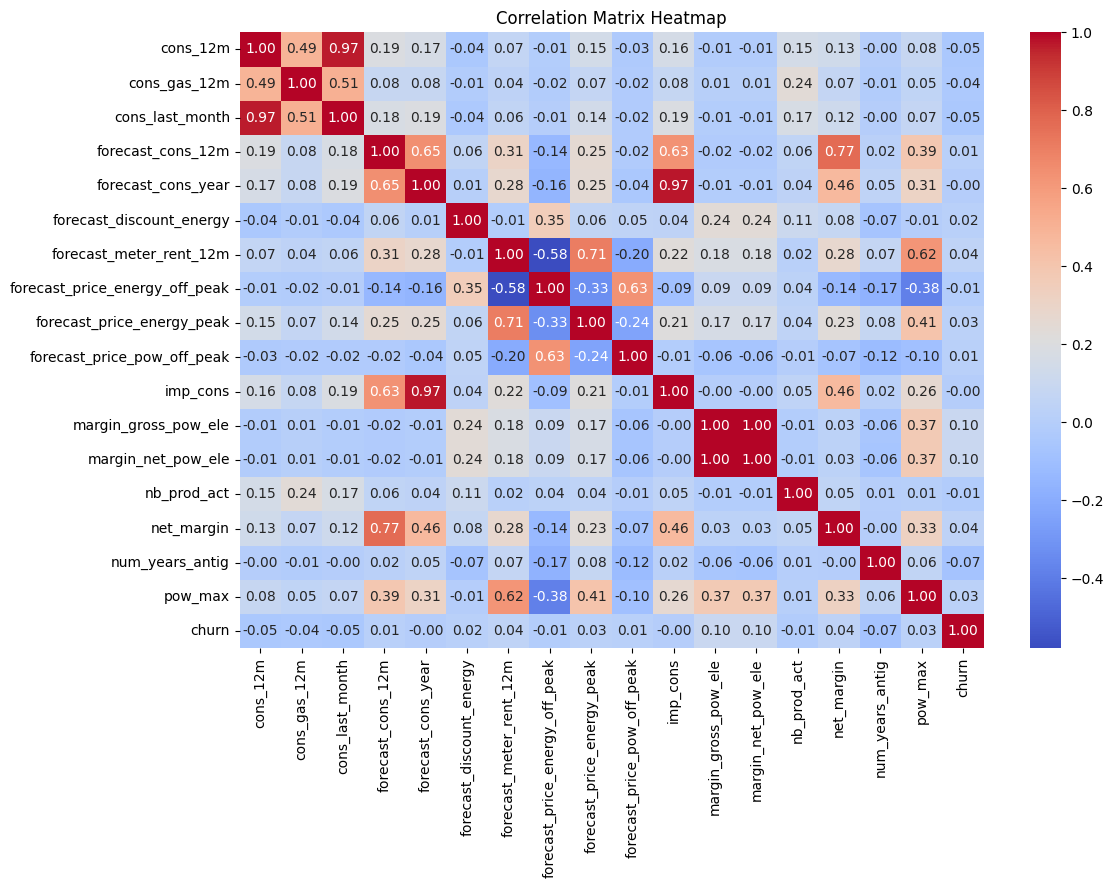

In [49]:
selected_columns = [
    'cons_12m', 'cons_gas_12m', 'cons_last_month',
    'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
    'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 'forecast_price_pow_off_peak',
    'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
    'net_margin', 'num_years_antig', 'pow_max', 'churn'
]
matrix=data_set[selected_columns]

plt.figure(figsize=(12, 8))
sns.heatmap(matrix.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()




In [50]:
best_feat=SelectKBest(score_func=chi2,k='all')
x = data_set[['cons_12m', 'cons_gas_12m', 'cons_last_month',
          'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
          'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
          'forecast_price_energy_peak', 'forecast_price_pow_off_peak',
          'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
          'net_margin', 'num_years_antig', 'pow_max']]

y = data_set['churn']
fit=best_feat.fit(x,y)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)
feature_scores=pd.concat([dfscores,dfcolumns],axis=1)
feature_scores


,0,0
0,6.374196e+07,cons_12m
1,1.989403e+07,cons_gas_12m
2,7.711204e+06,cons_last_month
3,7.471082e+03,forecast_cons_12m
4,7.199071e+02,forecast_cons_year
5,1.142809e+02,forecast_discount_energy
6,1.984058e+03,forecast_meter_rent_12m
7,7.575139e-03,forecast_price_energy_off_peak
8,5.977403e-01,forecast_price_energy_peak
9,1.488225e+00,forecast_price_pow_off_peak


In [51]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)

[0.0890624  0.02762952 0.06399621 0.08612882 0.05477014 0.00409688
 0.08938368 0.07570645 0.03984076 0.02568597 0.05586937 0.07521839
 0.07681141 0.02665368 0.08883912 0.05054412 0.06976309]


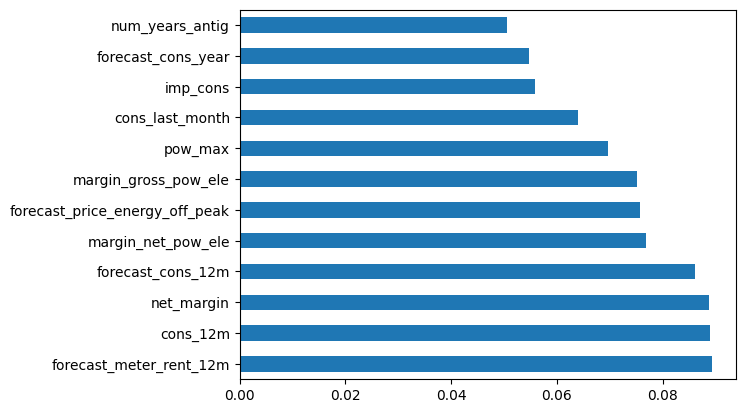

In [52]:
feat_imp=pd.Series(model.feature_importances_,index=x.columns)
feat_imp.nlargest(12).plot(kind='barh')
plt.show()

In [53]:
data_set.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [54]:
churn_dist=data_set['churn'].value_counts()
print(churn_dist)

0    13187
1     1419
Name: churn, dtype: int64


In [55]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
over_samp=RandomOverSampler(random_state=42)
X_new,Y_new=over_samp.fit_resample(x,y)

In [56]:
print("Class distribution after resampling:", Counter(Y_new))

Class distribution after resampling: Counter({1: 13187, 0: 13187})


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [58]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, Y_new, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended for some algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Logistic Regression model
model = LogisticRegression()

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Predict churn on the testing data
y_pred = model.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)




Model Accuracy: 0.6017061611374408
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.61      0.61      2639
           1       0.60      0.59      0.60      2636

    accuracy                           0.60      5275
   macro avg       0.60      0.60      0.60      5275
weighted avg       0.60      0.60      0.60      5275



In [59]:
data_mean = data_set.fillna(data_set.mean())
data_mean.head()

<ipython-input-59-923c931a6734>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_mean = data_set.fillna(data_set.mean())


,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


forecast_cons_12m	forecast_cons_year	forecast_discount_energy	forecast_meter_rent_12m	forecast_price_energy_off_peak	forecast_price_energy_peak	forecast_price_pow_off_peak	has_gas	imp_cons	margin_gross_pow_ele	margin_net_pow_ele	nb_prod_act	net_margin	num_years_antig	origin_up	pow_max	churn
0	0	0	1.78	0.114481	0.098142	40.606701	t	0	25.44	25.44	2	678.99	3	lxidpiddsbxsbosboudacockeimpuepw	43.648	1
189.95	0	0	16.27	0.145711	0	44.31137796	f	0	16.38	16.38	1	18.89	6	kamkkxfxxuwbdslkwifmmcsiusiuosws	13.8	0

In [60]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
sample_data= {'cons_12m':0, 'cons_gas_12m':54946, 'cons_last_month':0,
          'forecast_cons_12m':0, 'forecast_cons_year':0, 'forecast_discount_energy':0,
          'forecast_meter_rent_12m':1.78, 'forecast_price_energy_off_peak':0.114481,
          'forecast_price_energy_peak':0.098142, 'forecast_price_pow_off_peak':40.6067,
          'imp_cons':0, 'margin_gross_pow_ele':25.44, 'margin_net_pow_ele':25.44, 'nb_prod_act':2,
          'net_margin':678.99, 'num_years_antig':3, 'pow_max':43.648}

data_1=pd.DataFrame([sample_data])
data_1_t=scaler.transform(data_1)
prediction=model.predict(data_1_t)

if(prediction[0]==1):
  print("customer churned")
else:
  print("customer didnt churn ")





customer churned


In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

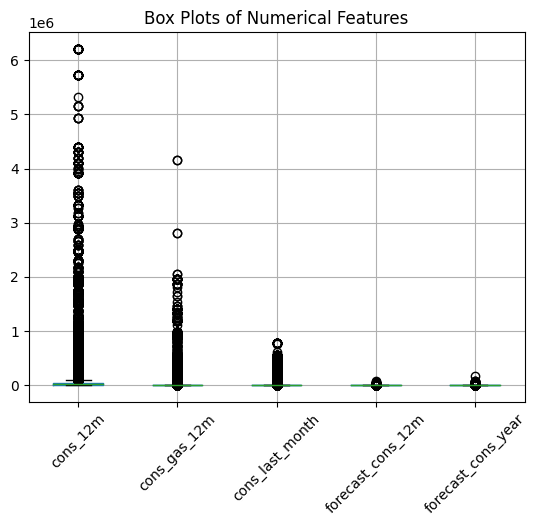

Rows with outliers:
                                     id                     channel_sales  \
12     2c05848e1a577dd041ea6804bbf5bbf5  foosdfpfkusacimwkcsosbicdxkicaua   
16     bd14bbac3aca710ee5288fcd8511d4bb                           MISSING   
36     9403f3f9ff06ec9e49db8255ede2b098  lmkebamcaaclubfxadlmueccxoimlema   
40     91607f6e0ed7143ab1a5b2abc20f1c00  foosdfpfkusacimwkcsosbicdxkicaua   
48     b96aa3a8655203318c6b853dbdb0ceb7  foosdfpfkusacimwkcsosbicdxkicaua   
...                                 ...                               ...   
14447  5b4bb2321c0996b313935bf0d8723e87                           MISSING   
14540  efadc67dddd797cad551542a7aa541fe  foosdfpfkusacimwkcsosbicdxkicaua   
14558  5ab426a76ed5b8d67ba031a28f2ef195  lmkebamcaaclubfxadlmueccxoimlema   
14571  8198633109cb1f7c3c1788ae02d7bfad  ewpakwlliwisiwduibdlfmalxowmwpci   
14586  6e5805466140ae1817101694e76a15a2  lmkebamcaaclubfxadlmueccxoimlema   

       cons_12m  cons_gas_12m  cons_last_month  date_ac

In [62]:
numerical_columns = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m', 'forecast_cons_year']

# Calculate Z-scores for the numerical columns
z_scores = np.abs((data_set[numerical_columns] - data_set[numerical_columns].mean()) / data_set[numerical_columns].std())

# Set a Z-score threshold for outlier detection
z_score_threshold = 3

# Find rows with at least one Z-score above the threshold
outliers = data_set[(z_scores > z_score_threshold).any(axis=1)]

# Create box plots for selected numerical columns
data_set[numerical_columns].boxplot()
plt.title('Box Plots of Numerical Features')
plt.xticks(rotation=45)
plt.show()

# Print the rows with identified outliers
print("Rows with outliers:")
print(outliers)








In [63]:
#using normalization:
from sklearn.preprocessing import Normalizer
scale=Normalizer()
data_set[numerical_columns]=scale.fit_transform(data_set[numerical_columns])
print(data_set.head())

                                 id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0  0.000000           1.0         0.000000  2013-06-15  2016-06-15   
1  0.999170           0.0         0.000000  2009-08-21  2016-08-30   
2  0.996136           0.0         0.000000  2010-04-16  2016-04-16   
3  0.988712           0.0         0.000000  2010-03-30  2016-03-30   
4  0.981332           0.0         0.116651  2010-01-13  2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  has_gas  imp_cons  \
0      2015-11-01   2015-06-23           0.000000  ...        t

In [64]:
numeric_column = 'cons_12m'
num_bins = 5
# Alternatively, you can specify custom bin edges if needed
# bin_edges = [0, 2000, 4000, 6000, 8000, 10000]

# Perform discretization using the pd.cut() function
data_set['discretized_column'] = pd.cut(data_set[numeric_column], bins=num_bins, labels=False)

# Print the first few rows of the DataFrame with the discretized column
print(data_set[['discretized_column', numeric_column]].head())

   discretized_column  cons_12m
0                   0  0.000000
1                   4  0.999170
2                   4  0.996136
3                   4  0.988712
4                   4  0.981332
